### Efectos que se usan en el vídeo

https://github.com/Diaz-De-Vivar/Generate-blurry-images-Python-code./blob/master/Posterizar_Distorsionar_Saturar.py

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

PATH = '/content/drive/My Drive/Colab Notebooks/flowers_data'

INPATH = PATH + '/inputFlowers'
OUTPATH = PATH + '/targetFlowers'
CKPATH = PATH + '/checkpoints'

# lista con el nombre de todas las imagenes
imgurls = !ls -1 "{INPATH}"


In [2]:
n = 500
train_n = round(n * 0.80)

# Listado random
randurls = np.copy(imgurls)

np.random.seed(23) # just for testing. change this later
np.random.shuffle(randurls)

# particion train/test
tr_urls = randurls[: train_n]
ts_urls = randurls[train_n : n]

print(len(imgurls), len(tr_urls), len(ts_urls))

8189 400 100


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


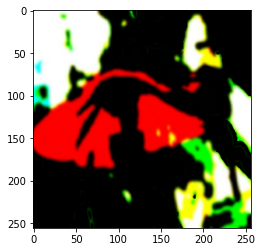

In [4]:
# PREPROCESAMIENTO DE LOS DATOS

IMG_WIDTH = 256
IMG_HEIGHT = 256


def resize (inimg, tgimg, height, width):
  inimg = tf.image.resize(inimg, [height, width])
  tgimg = tf.image.resize(tgimg, [height, width])

  return inimg, tgimg

# Normalizamos la imagen al rango [-1, +1]
def normalize (inimg, tgimg):
  # Las imagenes están en una representación matricial con valores de 0 a 255
  # Entonces dividimos los valores entre 255/2 = 127.5 para que estén en el dominio de 0 a 2
  # Luego le restamos 1 para que estén entre -1 y 1

  inimg = (inimg / 127.5) - 1
  tgimg = (tgimg / 127.5) - 1

  return inimg, tgimg

# Aumentación de datos: Random crop + Flip´
def random_jitter (inimg, tgimg):

  inimg, tgimg = resize(inimg, tgimg, 286, 286)

  stacked_image = tf.stack([inimg, tgimg], axis=0)
  cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  inimg, tgimg = cropped_image[0], cropped_image[1]

  if tf.random.uniform(()) > 0.5:
    inimg = tf.image.flip_left_right(inimg)
    tgimg = tf.image.flip_left_right(tgimg)

  return inimg, tgimg
  

def load_image(filename, augment=True):
  
  # [..., :3] -> limitamos las dimensiones a 3, en caso de usar otro formato (e.g. png tiene 4 canales)
  inimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(INPATH + '/' + filename)), tf.float32)[..., : 3]
  tgimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(OUTPATH + '/' + filename)), tf.float32)[..., : 3]

  inimg, tgimg = resize(inimg, tgimg, IMG_HEIGHT, IMG_WIDTH)

  if augment:
    inimg, tgimg = random_jitter(inimg, tgimg)


  inimg, tgimg = normalize(inimg, tgimg)

  return inimg, tgimg

def load_train_image(filename):
  return load_image(filename, True)

def load_test_image(filename):
  return load_image(filename, False)

plt.imshow(load_train_image(randurls[0])[0])


In [4]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x
